## Data Visualization

### Introduction

Data visualization is the next step after collecting the data. This is a technique used to gain insights and understand the data gathered. It also helps us to determine if the data is ready for further processing or if we need to collect more data or clean the data

This technique is also used to visualize the results we get after making an ML model and helps to present the outcome.

In this notebook, we will focus on data visualization using the matplotlib library, a popular data visualization library in Python.

### Context

We will be working with Jaipur weather data obtained from [Kaggle](https://www.kaggle.com/datasets/rajatdey/jaipur-weather-forecasting), a platform for data enthusiasts to gather, share knowledge and compete for many prizes!

The data has been cleaned and simplified, so that we can focus on data visualization instead of data cleaning.

#### Data in agriculture

Imagine that you are a farmer. What would be your main concerns? You want to have the best conditions for your crops to grow and bear good yield.

The weather is a crucial factor to the success of your farm (unless you are running an indoor farm). Thankfully, you can more easily find weather data now with the prevalence of sensor technology. There are also numerous open data sources out there for you to collect your weather data.

- [India open data source](https://data.gov.in/keywords/weather)

Alright, you have obtained your data (jaipur_weather_clean.csv). This file contains weather information of Jaipur.

What do you do next?

Let's use pandas to open the csv file. We will begin by importing pandas and reading our csv file

In [1]:
import pandas as pd #import pandas as pd means we can type "pd" to call the pandas library

In [2]:
dataframe = pd.read_csv("datasets/jaipur_weather_clean.csv") #read the csv file and store it in the variable dataframe
dataframe.head()

,date,mean_temperature,max_temperature,min_temperature,Mean_dew_pt,mean_pressure,max_humidity,min_humidity,max_dew_pt_1,max_dew_pt_2,min_dew_pt_1,min_dew_pt_2,max_pressure_1,max_pressure_2,min_pressure_1,min_pressure_2,rainfall
0,2016-05-04,34,41,27,6,1006.00,27,5,12,10,-2,-2,1009,1008,1000,1001,0.0
1,2016-05-05,31,38,24,7,1005.65,29,6,13,12,0,-2,1008,1009,1001,1000,0.0
2,2016-05-06,28,34,21,11,1007.94,61,13,16,13,6,0,1011,1008,1003,1001,5.0
3,2016-05-07,30,38,23,13,1008.39,69,18,17,16,9,6,1011,1011,1004,1003,0.0
4,2016-05-08,34,41,26,10,1007.62,50,8,14,17,6,9,1010,1011,1002,1004,0.0


Lets see how many datapoints we have

In [13]:
dataframe.info() #print the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              676 non-null    object 
 1   mean_temperature  676 non-null    int64  
 2   max_temperature   676 non-null    int64  
 3   min_temperature   676 non-null    int64  
 4   Mean_dew_pt       676 non-null    int64  
 5   mean_pressure     676 non-null    float64
 6   max_humidity      676 non-null    int64  
 7   min_humidity      676 non-null    int64  
 8   max_dew_pt_1      676 non-null    int64  
 9   min_dew_pt_1      676 non-null    int64  
 10  max_pressure_1    676 non-null    int64  
 11  min_pressure_1    676 non-null    int64  
 12  rainfall          676 non-null    float64
dtypes: float64(2), int64(10), object(1)
memory usage: 68.8+ KB


Lets look at the datatypes we have. If you remember from week 1, we use the ``dtypes`` attribute to do this

In [3]:
dataframe.dtypes

date                 object
mean_temperature      int64
max_temperature       int64
min_temperature       int64
Mean_dew_pt           int64
mean_pressure       float64
max_humidity          int64
min_humidity          int64
max_dew_pt_1          int64
max_dew_pt_2          int64
min_dew_pt_1          int64
min_dew_pt_2          int64
max_pressure_1        int64
max_pressure_2        int64
min_pressure_1        int64
min_pressure_2        int64
rainfall            float64
dtype: object

Okay, great! we can see the headers of the columns (mean_temperature, max_temperature, etc) as well as its corresponding datatypes. Looks like there are 16 columns in this dataset (excluding data). For this exercise, let's say the columns, ``max_dew_pt_2``, ``min_dew_pt_2``, ``max_pressure_2``, ``min_pressure_2`` are not required. We will drop them with the help of the ``drop()`` function

In [4]:
dataframe = dataframe.drop(["max_dew_pt_2","min_dew_pt_2", "max_pressure_2", "min_pressure_2"], axis=1)

Check again if it has been dropped

In [5]:
dataframe.dtypes

date                 object
mean_temperature      int64
max_temperature       int64
min_temperature       int64
Mean_dew_pt           int64
mean_pressure       float64
max_humidity          int64
min_humidity          int64
max_dew_pt_1          int64
min_dew_pt_1          int64
max_pressure_1        int64
min_pressure_1        int64
rainfall            float64
dtype: object

Great! now we will focus on this set of the data

#### Sorting values using pandas

Many times, you want to have a sense of range of data to help you understand more about it. Another feature of pandas dataframe is sorting of values. You can do so by using the ``sort_values()`` function. If you want to know what a function does, another feature you can use is the ``?`` operator after the function. For example:

In [7]:
dataframe.sort_values?

Signature:
dataframe.sort_values(
    by,
    axis: 'Axis' = 0,
    ascending=True,
    inplace: 'bool' = False,
    kind: 'str' = 'quicksort',
    na_position: 'str' = 'last',
    ignore_index: 'bool' = False,
    key: 'ValueKeyFunc' = None,
)
Docstring:
Sort by the values along either axis.

Parameters
----------
        by : str or list of str
            Name or list of names to sort by.

            - if `axis` is 0 or `'index'` then `by` may contain index
              levels and/or column labels.
            - if `axis` is 1 or `'columns'` then `by` may contain column
              levels and/or index labels.
axis : {0 or 'index', 1 or 'columns'}, default 0
     Axis to be sorted.
ascending : bool or list of bool, default True
     Sort ascending vs. descending. Specify list for multiple sort
     orders.  If this is a list of bools, must match the length of
     the by.
inplace : bool, default False
     If True, perform operation in-place.
kind : {'quicksort', 'mergesort', 'he

Anyway, let's use this function on our dataframe

In [6]:
jaipur_weather = dataframe.sort_values(by='date',ascending = False)
jaipur_weather.head()

,date,mean_temperature,max_temperature,min_temperature,Mean_dew_pt,mean_pressure,max_humidity,min_humidity,max_dew_pt_1,min_dew_pt_1,max_pressure_1,min_pressure_1,rainfall
675,2018-03-11,26,34,18,4,1013.76,38,6,8,0,1017,1009,0.0
674,2018-03-10,26,34,19,3,1014.16,37,8,6,-1,1017,1009,0.0
673,2018-03-09,26,33,19,1,1014.41,42,7,5,-5,1017,1011,0.0
672,2018-03-08,24,32,15,2,1014.07,55,5,8,-6,1017,1011,0.0
671,2018-03-07,24,32,15,4,1015.39,48,6,9,-3,1018,1012,0.0


What do you notice from the number? Look at the date. Can you see how the function help us sort data based on the date?

Let's sort the values in ascending order of mean temperature and print the first 5 rows

In [8]:
jaipur_weather = dataframe.sort_values(by='mean_temperature',ascending = True)
jaipur_weather.head()

,date,mean_temperature,max_temperature,min_temperature,Mean_dew_pt,mean_pressure,max_humidity,min_humidity,max_dew_pt_1,min_dew_pt_1,max_pressure_1,min_pressure_1,rainfall
252,2017-01-11,10,18,3,3,1017.00,94,17,9,-5,1019,1015,0.0
253,2017-01-12,12,19,4,-3,1017.54,70,13,2,-7,1020,1015,0.0
254,2017-01-13,12,20,4,-5,1017.24,75,4,2,-93,1020,1015,0.0
255,2017-01-14,12,20,5,-1,1017.75,70,10,1,-8,1020,1016,0.0
258,2017-01-17,12,20,5,3,1017.35,74,15,7,-2,1019,1015,0.0


Look at the max and min temperature! See the range of temperature that one can experience within a day.

Let's sort the values in descending order of mean temperature

In [9]:
jaipur_weather = dataframe.sort_values(by='mean_temperature',ascending = False)
jaipur_weather.head()

,date,mean_temperature,max_temperature,min_temperature,Mean_dew_pt,mean_pressure,max_humidity,min_humidity,max_dew_pt_1,min_dew_pt_1,max_pressure_1,min_pressure_1,rainfall
32,2016-06-05,38,45,31,5,1004.67,27,4,18,2,1007,999,0.0
15,2016-05-19,38,46,29,11,999.88,45,5,17,6,1002,994,0.0
31,2016-06-04,38,44,31,13,1004.93,34,10,18,7,1008,999,0.0
34,2016-06-07,38,45,30,13,1003.29,51,5,21,5,1007,997,0.0
35,2016-06-08,38,44,31,12,1002.83,47,4,22,2,1006,996,0.0


See how the temperature ranges within a year? 10C to 38C!

Now we have a clearer picture of our dataset. Using these functions, we can analyze our data and gain insights of them.

However, we want to get an even better picture. We want to learn how to explore these data visually.

Let's now use the matplotlib library to help us with data visualization in Python.

## Matplotlib

[Matplotlib](https://matplotlib.org/) is a Python 2D plotting library that we can use to produce high quality data visualization. It is highly usable (as you will soon find out), you can create simple and complex graphs with just a few lines of codes!

Now let's load matplotlib to start plotting some graphs

In [10]:
import matplotlib.pyplot as plt # we use plt to make it easier to call the library just as we did with pandas and numpy
import numpy as np

Matplotlib supports various types of graphs/plots such as scatter plot, line plot, histograms, boxplot, etc. We will look into some of these and how to plot them. We will also talk about how these plots help us make insights into the data. This will further help us in deciding what type of model would be best suited for the task given the data in hand.

### Scatter Plot

Scatter plots use a collection of points on a graph to display values from two variables. This allow us to see if there is any relationship or correlation between the two variables.

Let's see how mean temperature changes over the years!

We use the ``scatter()`` function which takes x and y as arguments where x and y are array-like.
The ``show()`` function shows the plot

We can access a column of the dataframe by using the column name as an attribute

In [11]:
x = dataframe.date # x an array of dates This is also one way to access a column in a dataframe
y = dataframe.mean_temperature # y an array of mean temperatures

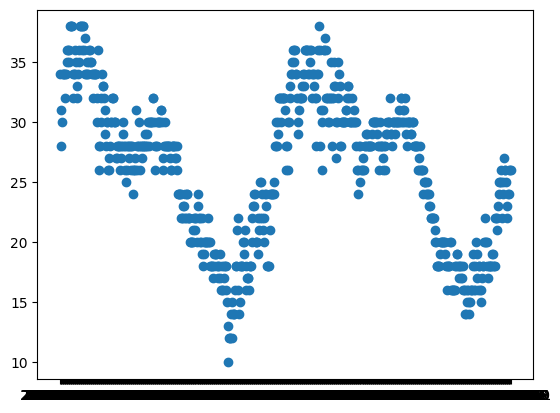

In [12]:
plt.scatter(x,y)
plt.show()

Do you see that the x axis is filled with a thick line, and that there's no tick label available? This makes us unable to analyze the data.

Let's try to modify this scatter plot so that we can see the ticks!

One reason why there's a thick bar below the x axis is that there are numerous labels (2 years daily data) on the x axis.

The first thing we are going to do is to then reduce the number of ticks/ points for the x axis. We do this using the np.arrange function as below:
The ``xticks()`` function allows us to modify the x-ticks to our liking. Use to ``?`` operator on the function to know more

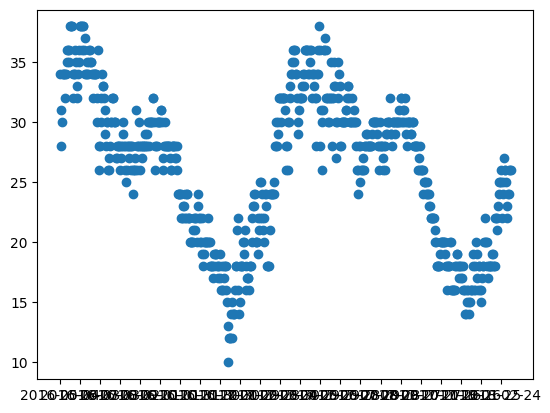

In [15]:
plt.scatter(x,y)
plt.xticks(np.arange(0, len(x), step=30)) # len(x) is the length of the x array, so this line of code will show the x axis in increments of 30 days
plt.show()

See, now you can see the numbers clearer, but they are still overlapping. Change x ticks interval so that you can see the dates clearly

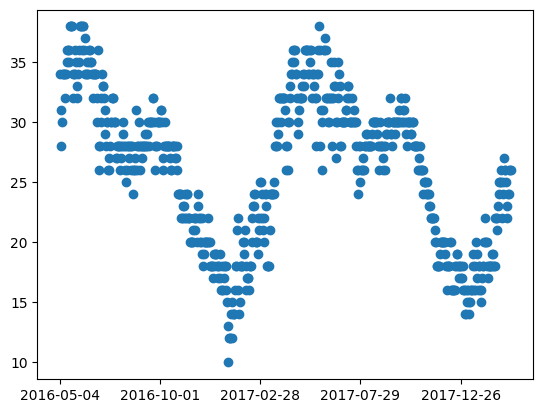

In [17]:
plt.scatter(x,y)
plt.xticks(np.arange(0, len(x), 150))
plt.show()

What is the interval you use so that you can see all the dates? Try it out yourself. Do you notice that now we are only having very few ticks? Lets rotate the x-ticks to fit more of them with the help of the ``rotation`` parameter that the ``xticks()`` function has

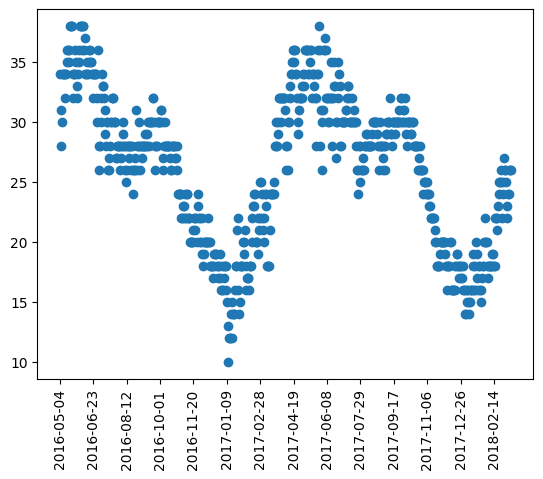

In [21]:
plt.scatter(x,y)
plt.xticks(np.arange(0, len(x), 50))
plt.xticks(rotation=90)
plt.show()

Now we can see the x-ticks clearly.

We can also add labels to the x-axis and y-axis and a title too with the help of ``title()``, ``xlabel()`` and ``ylabel()`` functions

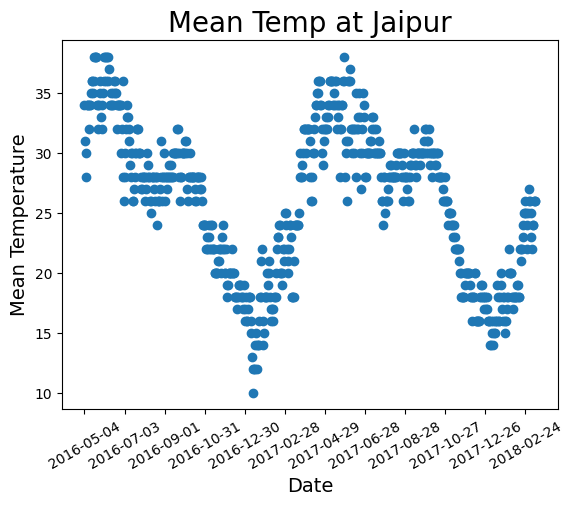

In [22]:
plt.scatter(x,y)
plt.xticks(np.arange(0, len(x), 60))
plt.xticks (rotation=30)

# Add x and y labels and set a font size
plt.title("Mean Temp at Jaipur", fontsize = 20)
plt.xlabel ("Date", fontsize = 14)
plt.ylabel ("Mean Temperature", fontsize = 14)

plt.show()

As a final example, lets change the size of the plot with the help of the ``figure()`` function it takes ``figsize`` as an argument of type ``tuple`` to represent the size (x,y)

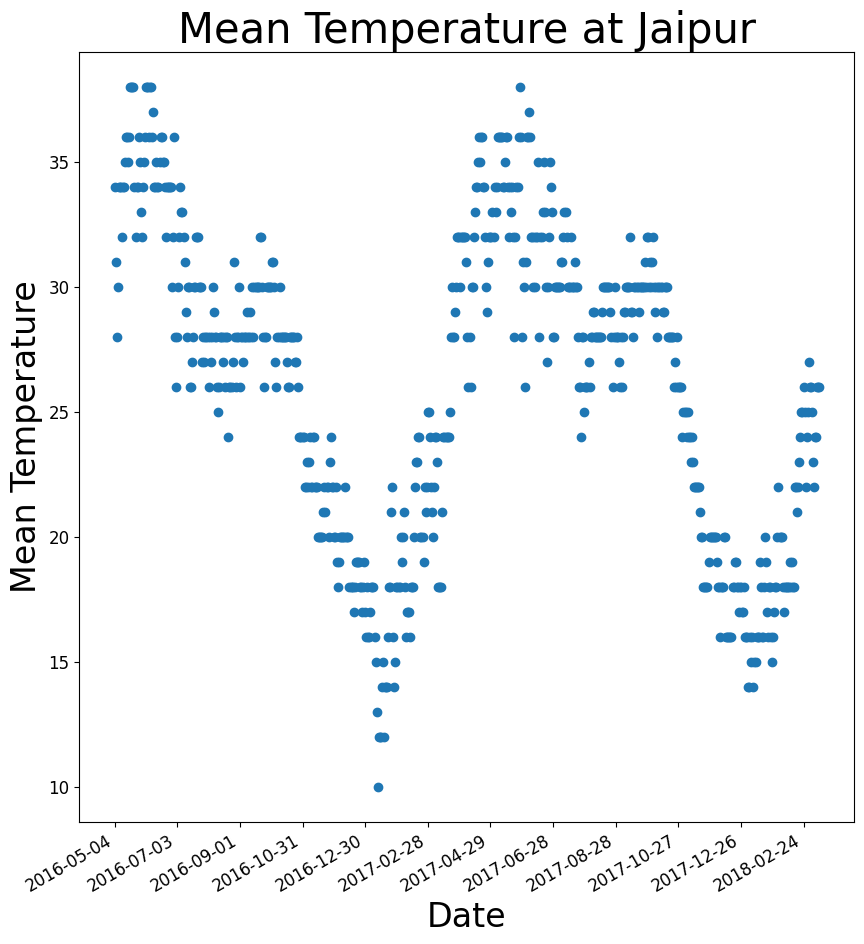

In [23]:
# Change the default figure size
plt.figure(figsize=(10,10))

plt.scatter(x,y)
plt.xticks(np.arange(0, len(x), 60))
plt.xticks (rotation=30)

# Add x and y labels, title and set a font size
plt.xlabel ("Date", fontsize = 24)
plt.ylabel ("Mean Temperature", fontsize = 24)
plt.title('Mean Temperature at Jaipur', fontsize = 30)

# Set the font size of the number labels on the axes
plt.xticks (fontsize = 12)
plt.yticks (fontsize = 12)

plt.xticks (rotation=30, horizontalalignment='right')


plt.show()

### Line Plots

Besides showing relationship using scatter plot, time data as above can also be represented with a line plot. Let's see how this is done!

The ``plot()`` function is used and it takes x and y as arguments just like the scatter function

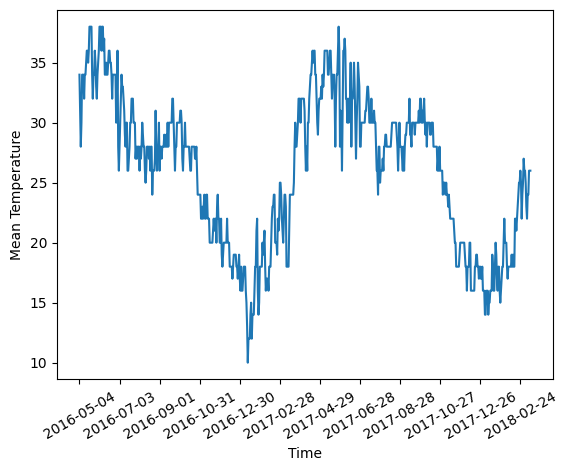

In [25]:
y = dataframe.mean_temperature

plt.plot(x,y)
plt.ylabel("Mean Temperature")
plt.xlabel("Time")

plt.xticks(np.arange(0, len(x), 60), rotation=30)
plt.xticks()

plt.show()

You can even have multiple line plots in one graph. The ``legend()`` function shows the legend of the graph

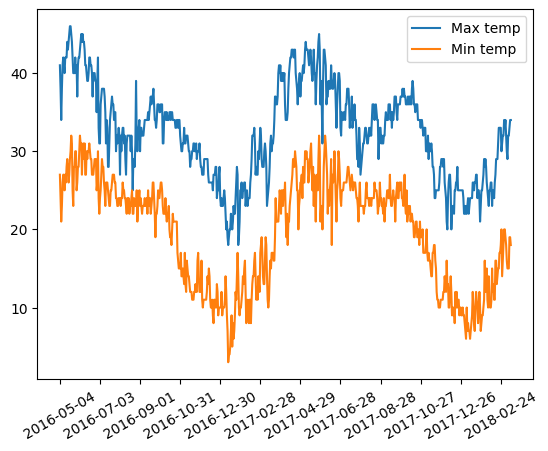

In [26]:
x = dataframe.date
y_1 = dataframe.max_temperature
y_2 = dataframe.min_temperature

plt.plot(x,y_1, label = "Max temp") 
plt.plot(x,y_2, label = "Min temp") 

plt.xticks(np.arange(0, len(x), 60))
plt.xticks (rotation=30)

plt.legend()
plt.show()

Here is an example of 3 line plots in one graph!

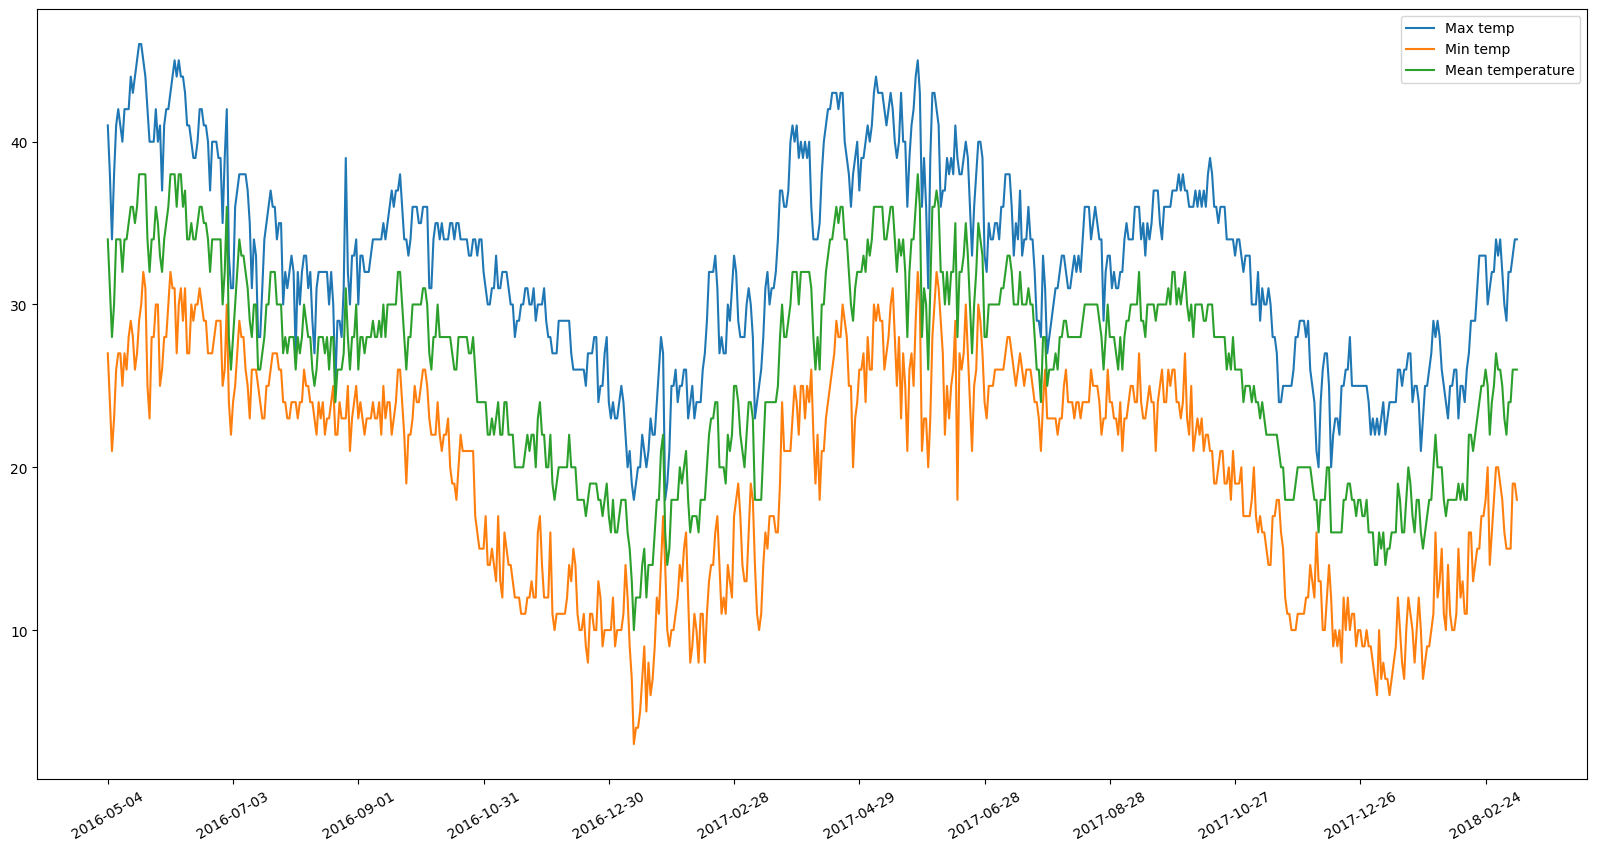

In [27]:
x = dataframe.date
y_1 = dataframe.max_temperature
y_2 = dataframe.min_temperature
y_3 = dataframe.mean_temperature

plt.figure(figsize=(20,10))
plt.plot(x,y_1, label = "Max temp") 
plt.plot(x,y_2, label = "Min temp") 
plt.plot(x,y_3, label = "Mean temperature")

plt.xticks(np.arange(0, len(x), 60))
plt.xticks (rotation=30)

plt.legend()
plt.show()

This is the basics of matplotlib. Some more advanced functions are discussed in the next part along with an interactive example on how data visualization helps to choose which features are needed and which may be discarded